# 图像特效-通道增强

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [10]:
def threshold(src,threshmax,newval):
    dst = np.zeros_like(src)
    idx = (src <= threshmax)
    dst[idx] = newval
    dst[~idx] = src[~idx]
    return dst

In [16]:
def channel_enhance(img, channel, level=1):
    if channel == 'B':
        blue_channel = img[:,:,2]
        # blue_channel = (blue_channel - 128) * (level) +128
        blue_channel = blue_channel * level
        blue_channel = threshold(blue_channel,threshmax=255, newval=255)
        img[:,:,2] = blue_channel
    elif channel == 'G':
        green_channel = img[:,:,1]
        # green_channel = (green_channel - 128) * (level) +128
        green_channel = green_channel * level
        green_channel = threshold(green_channel,threshmax=255, newval=255)
        img[:,:,1] = green_channel
    elif channel == 'R':
        red_channel = img[:,:,0]
        red_channel = (red_channel - 128) * (level) +128
        red_channel = red_channel * level
        red_channel = threshold(red_channel,threshmax=255, newval=255)
        img[:,:,0] = red_channel
        img = img.astype(np.uint8)
    return img

In [17]:
dst = channel_enhance(rgb,'B',level=2)

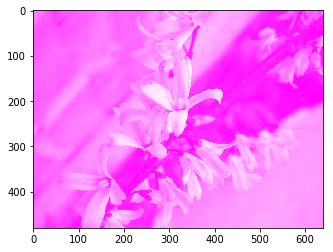

In [19]:
plt.imshow(dst)